# Brief Insight about HR Analytics:

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.They first identify a set of employees based on recommendations/ past performance.

2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.

3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

# Aim: To Predict whether to give Promotion to an employee or not

Predict employee is_promoted or not, and those who selected for seperate training and evaluation program have to check their 
training performance, KPIs completion..etc., based on these attributes we should decide whether to give promotion.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
%cd "C:\Users\sujit\Downloads\PGA 26 datasets\HR Analytics"

C:\Users\sujit\Downloads\PGA 26 datasets\HR Analytics


In [3]:
# Load the Data
train=pd.read_csv("train_LZdllcl.csv")
test=pd.read_csv("test_2umaH9m.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test['is_promoted']='test'

In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,test
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,test
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,test
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,test
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,test


In [9]:
#Combine the dataframe for the preprocessing.
combinedf=pd.concat([train,test],axis=0)

In [10]:
combinedf.shape

(78298, 14)

In [11]:
combinedf.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
combinedf.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,test
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,test
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,test
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,test
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,test


In [13]:
combinedf.shape

(78298, 14)

In [14]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 9.0+ MB


In [15]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [16]:
#Summarize quantitative variables using describe()
train[['no_of_trainings','age','length_of_service','avg_training_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0


# Data Preprocessing

# Missing Values Treatment

In [17]:
#Check for the null/missing values
combinedf.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [18]:
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [19]:
# Filling missing values for categorical features
combinedf.education=combinedf.education.fillna("Bachelor's")

In [20]:
combinedf.education.value_counts(dropna=False)

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [21]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [22]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)

In [23]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [24]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 9.0+ MB


In [25]:
# Divide the data into numerical ("numcols") and categorical ("chrcols") features
chrcols=combinedf[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?']]
numcols=combinedf[['no_of_trainings', 'age','length_of_service','avg_training_score']]

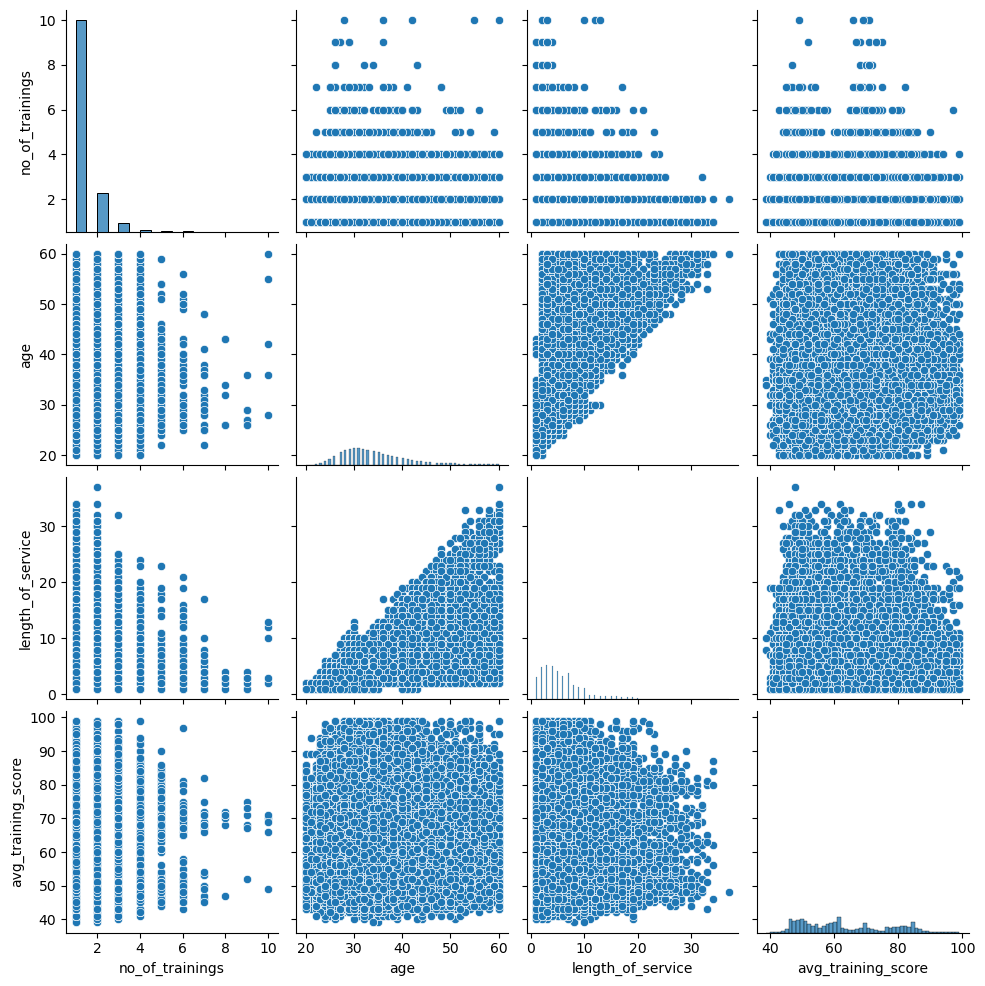

In [26]:
# Pairplot or Correlation
sns.pairplot(numcols)
plt.show()

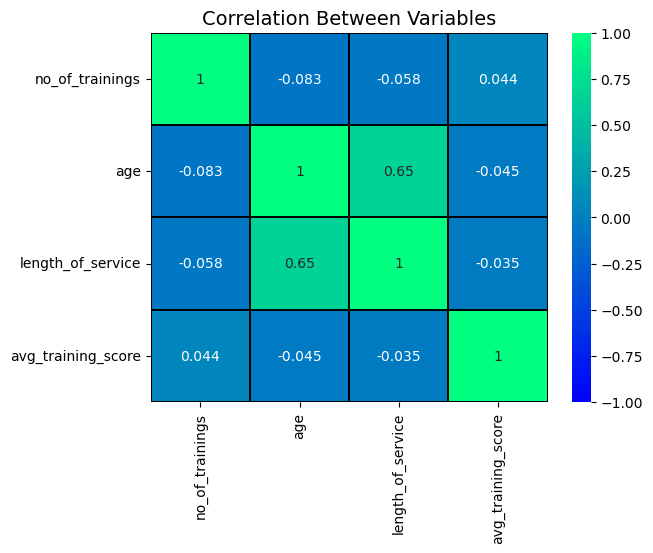

In [27]:
# Checking Multicollinearity
sns.heatmap(numcols.corr(),annot=True,vmax=1,vmin=-1,linewidths=0.1,linecolor='black',cmap='winter')
plt.title('Correlation Between Variables',fontsize=14)
plt.xticks(rotation=90)
plt.show()
# There is No MultiCollinearity

In [28]:
# for EDA split combinedf into train & test
train=combinedf[combinedf.is_promoted!='test']
test=combinedf[combinedf.is_promoted=='test']

In [29]:
test=test.drop('is_promoted',axis=1)

In [30]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [31]:
pd.DataFrame(train).to_csv("hranlaytics train.csv")

# Encoding

In [32]:
# Encoding with pd.get_dummies()
chrcols_dummy=pd.get_dummies(chrcols,columns=['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating','KPIs_met >80%', 'awards_won?'])

In [33]:
chrcols_dummy.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [34]:
# Checking numcols to do scaling or not
numcols.head()

,no_of_trainings,age,length_of_service,avg_training_score
0,1,35,8,49
1,1,30,4,60
2,1,34,7,50
3,2,39,10,50
4,1,45,2,73


In [35]:
# Combining Encoded chrcols and numcols into a Dataframe
combinedf_clean=pd.concat([numcols,chrcols_dummy,combinedf.is_promoted],axis=1)

In [36]:
train_df=combinedf_clean[combinedf_clean['is_promoted']!='test']
test_df=combinedf_clean[combinedf_clean['is_promoted']=='test']

In [37]:
test_df=test_df.drop('is_promoted',axis=1)

# Exploratory Data Analysis

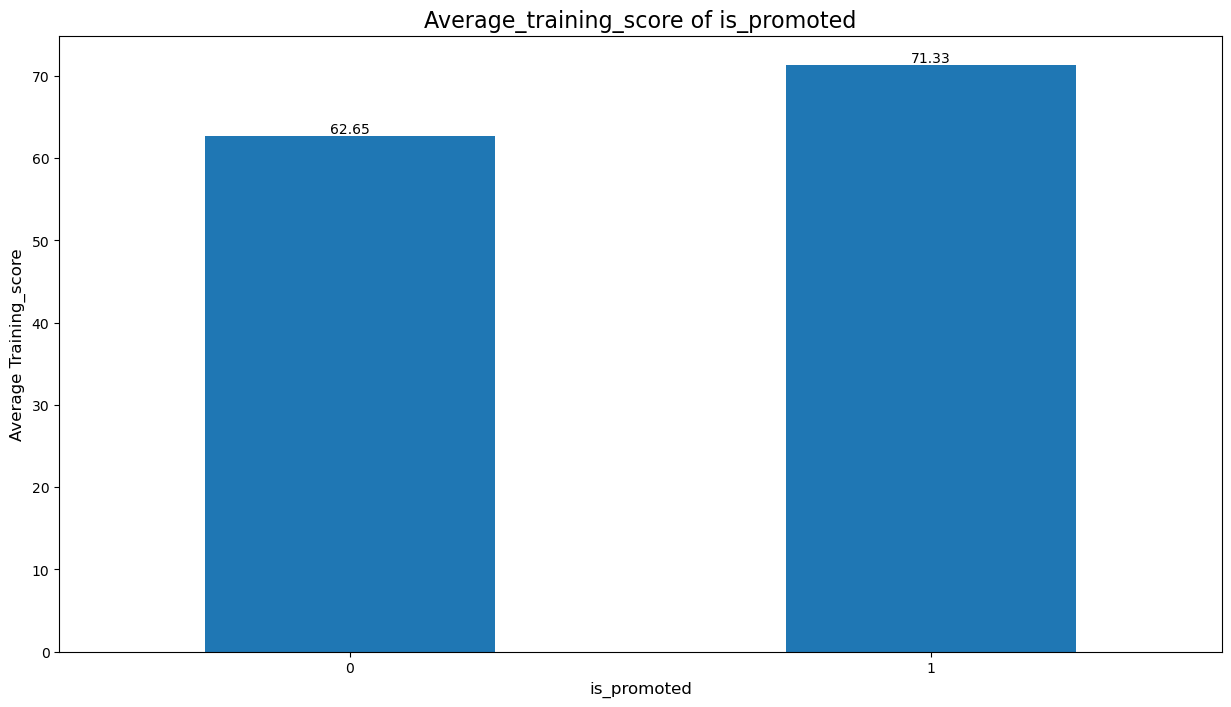

In [38]:
# Use train_df as well as train data for EDA
# What is the Average_training_score of is_promoted 0 & 1?
a=np.round(train.avg_training_score.groupby(train.is_promoted).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('is_promoted',fontsize=12)
plt.ylabel('Average Training_score',fontsize=12)
plt.title('Average_training_score of is_promoted',fontsize=16)
plt.show()

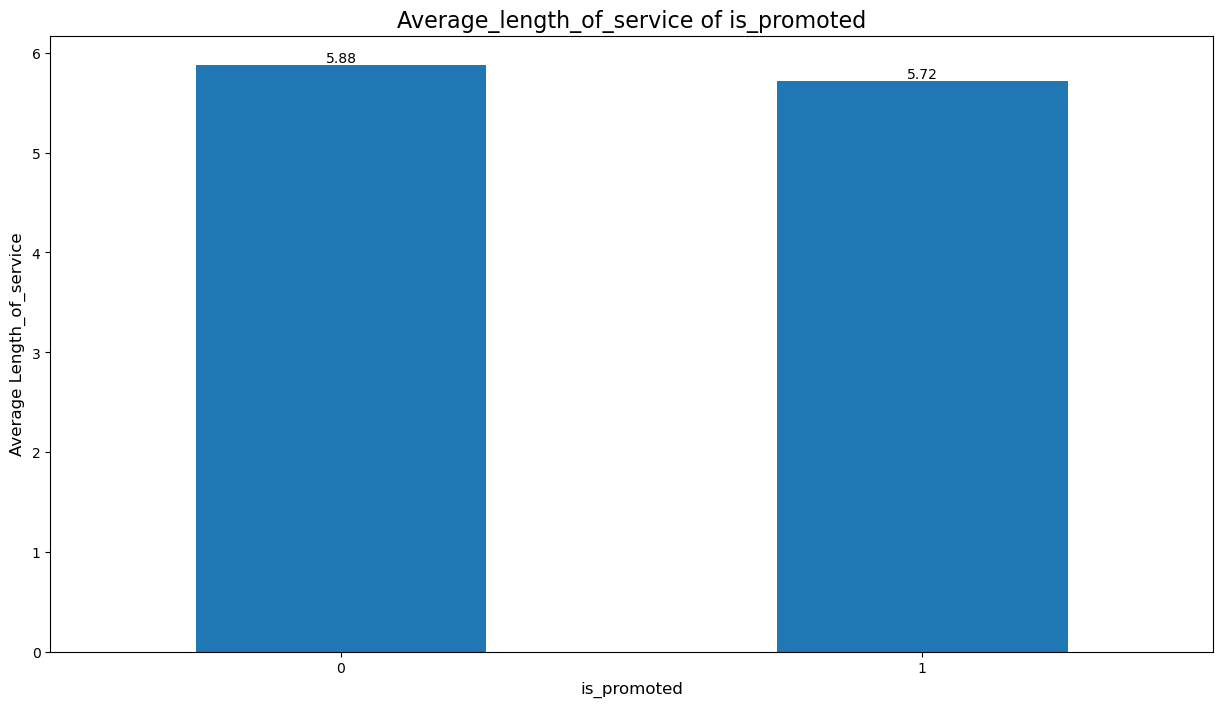

In [39]:
# What is the Average length_of_service of is_promoted 0 & 1?
a=np.round(train.length_of_service.groupby(train.is_promoted).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('is_promoted',fontsize=12)
plt.ylabel('Average Length_of_service',fontsize=12)
plt.title('Average_length_of_service of is_promoted',fontsize=16)
plt.show()

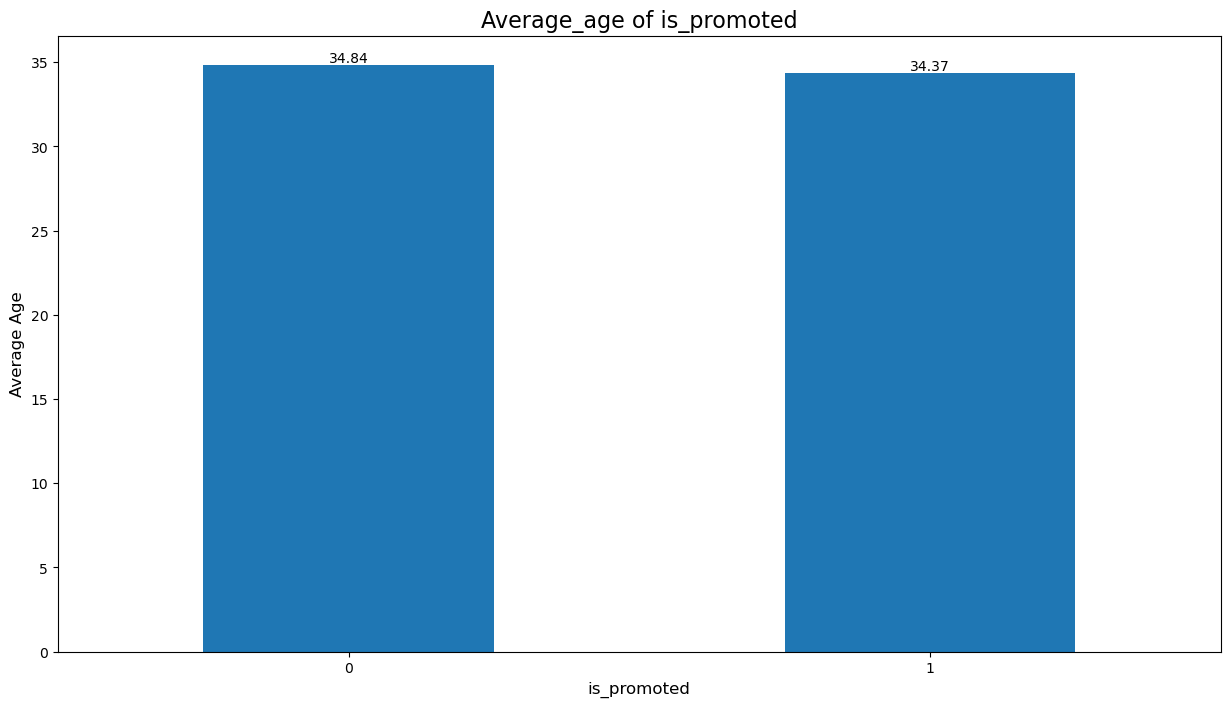

In [40]:
# What is the Average age of is_promoted 0 & 1?
a=np.round(train.age.groupby(train.is_promoted).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('is_promoted',fontsize=12)
plt.ylabel('Average Age',fontsize=12)
plt.title('Average_age of is_promoted',fontsize=16)
plt.show()

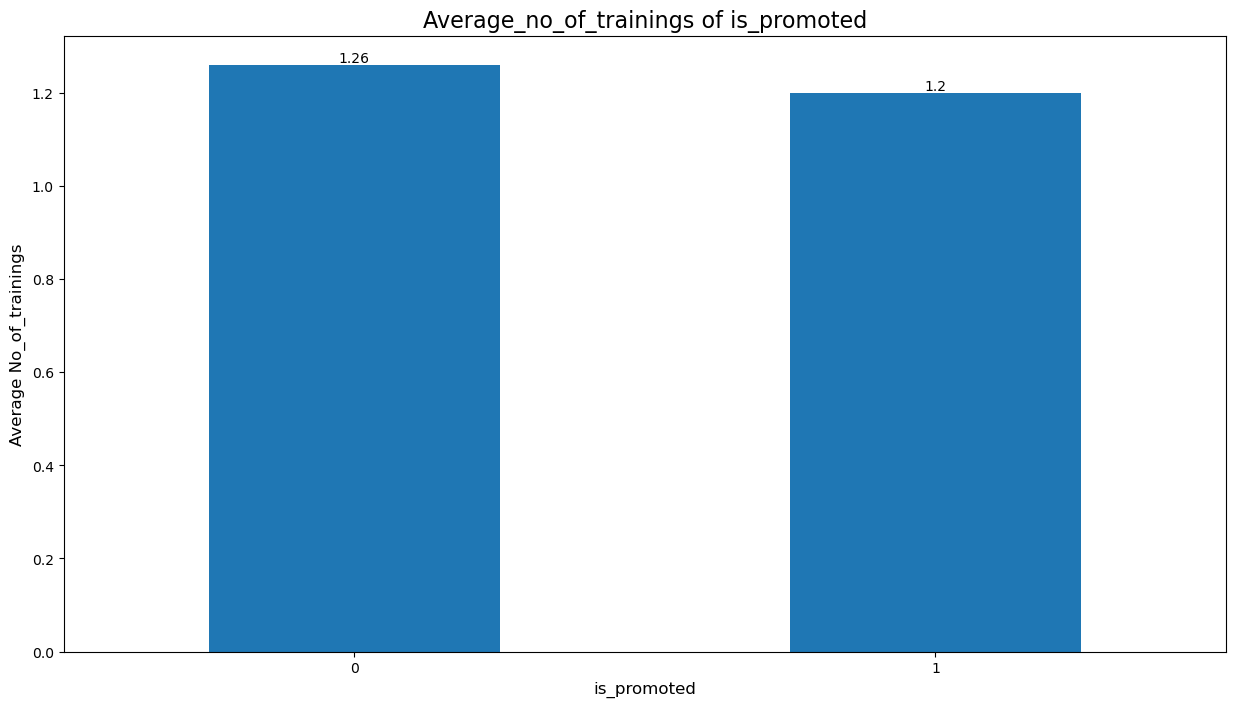

In [41]:
# What is the Average no_of_trainings of is_promoted 0 & 1?
a=np.round(train.no_of_trainings.groupby(train.is_promoted).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('is_promoted',fontsize=12)
plt.ylabel('Average No_of_trainings',fontsize=12)
plt.title('Average_no_of_trainings of is_promoted',fontsize=16)
plt.show()

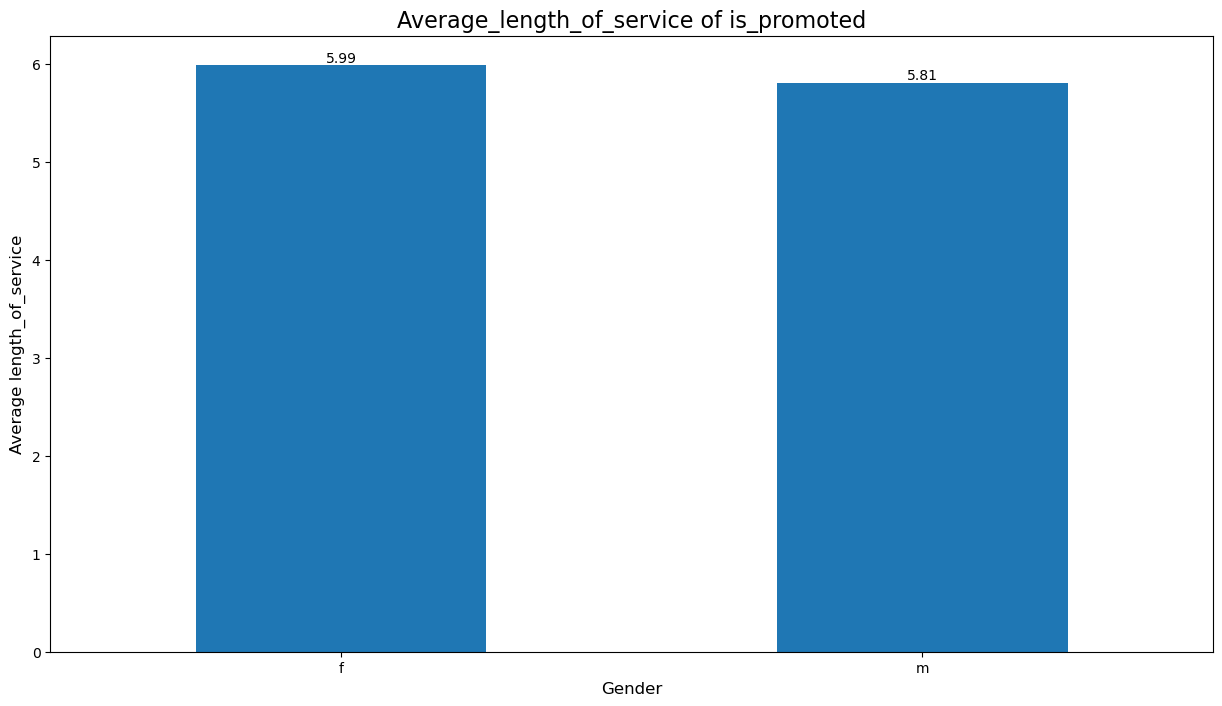

In [42]:
# What is the Average length_of_service of male & female?
a=np.round(train.length_of_service.groupby(train.gender).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Average length_of_service',fontsize=12)
plt.title('Average_length_of_service of is_promoted',fontsize=16)
plt.show()

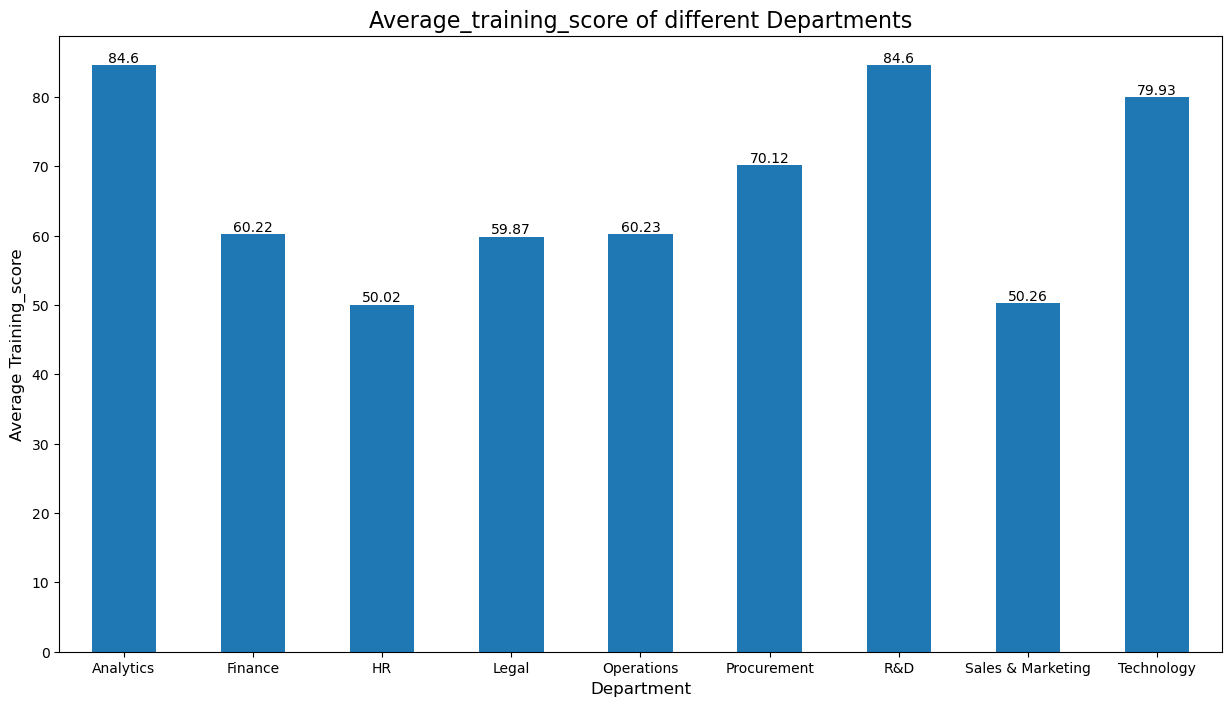

In [43]:
# What is the Average_training_score of different departments?
a=np.round(train.avg_training_score.groupby(train.department).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('Department',fontsize=12)
plt.ylabel('Average Training_score',fontsize=12)
plt.title('Average_training_score of different Departments',fontsize=16)
plt.show()

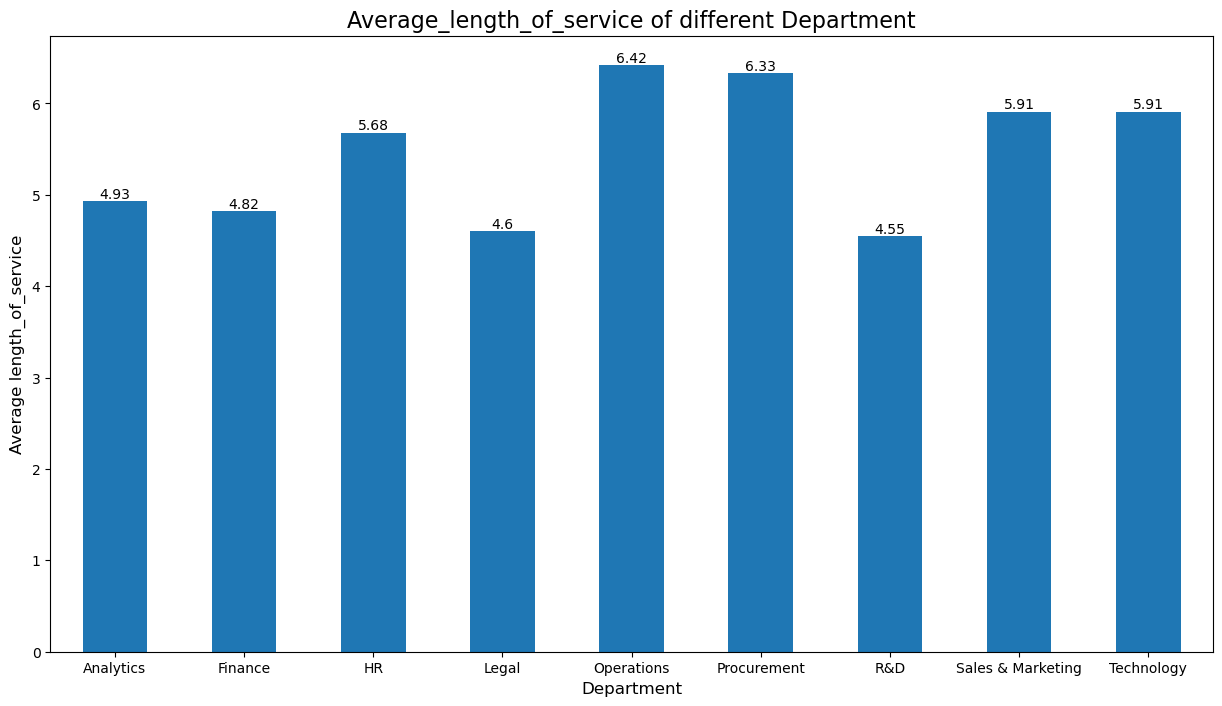

In [44]:
# What is the Average length_of_service of different departments?
a=np.round(train.length_of_service.groupby(train.department).mean(),2).plot(kind='bar',stacked=True,
                                                                    figsize=(15,8))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.xlabel('Department',fontsize=12)
plt.ylabel('Average length_of_service',fontsize=12)
plt.title('Average_length_of_service of different Department',fontsize=16)
plt.show()

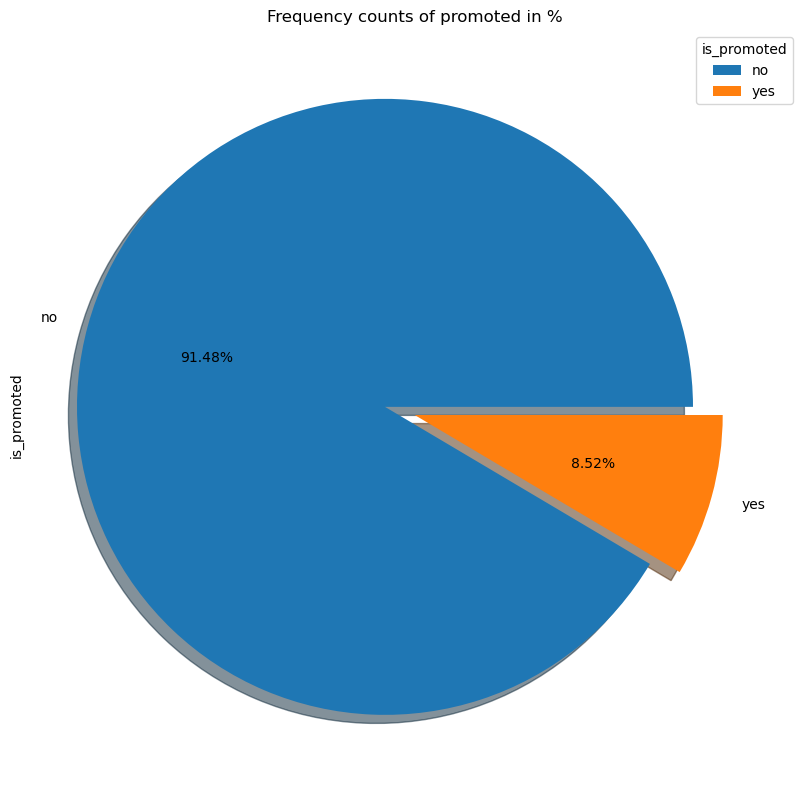

In [45]:
# How many employees got promoted.Create pie chart
plt.figure(figsize=(10,10))
train.is_promoted.value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0.1,0],labels=['no','yes'],
                                                     title='Frequency counts of promoted in %',shadow=True)
plt.legend(title='is_promoted',loc='best')
plt.show()

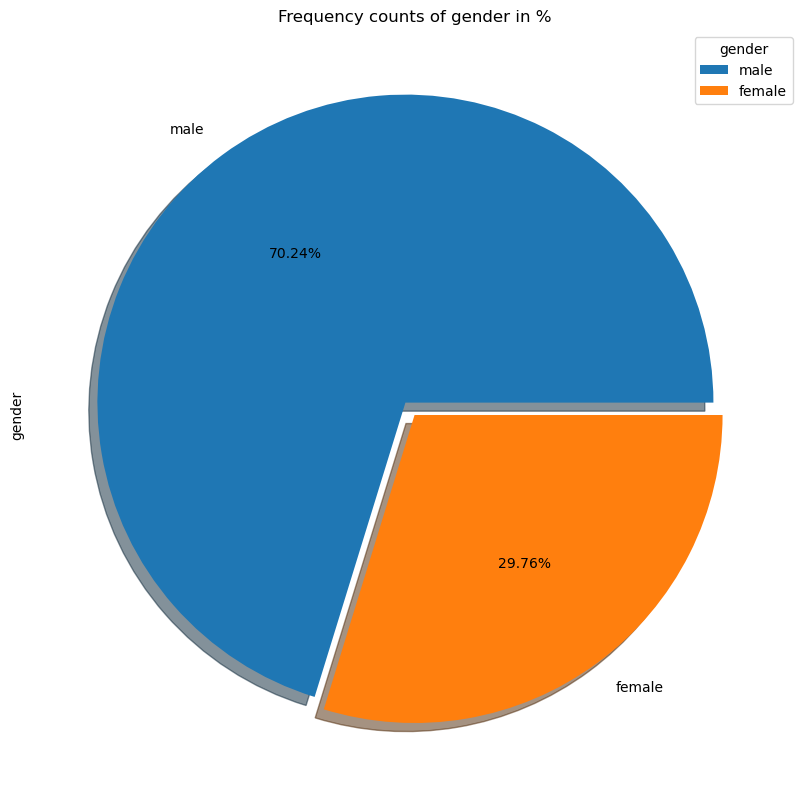

In [46]:
# How many male and female employees are there.Create pie chart
plt.figure(figsize=(10,10))
train.gender.value_counts().plot(kind='pie',autopct='%.2f%%',title='Frequency counts of gender in %',explode=[0.05,0],
                                                     shadow=True,labels=['male','female'])
plt.legend(title='gender',loc='best')
plt.show()

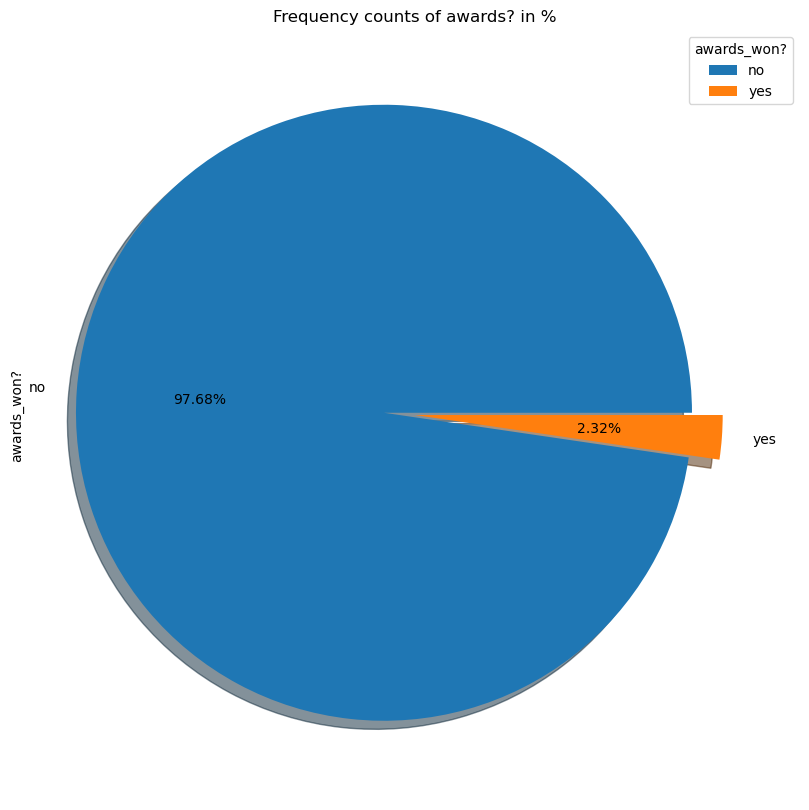

In [47]:
# How many employees won awards? Create pie chart
plt.figure(figsize=(10,10))
train['awards_won?'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Frequency counts of awards? in %',
                                             explode=[0.1,0],shadow=True,labels=['no','yes'])
plt.legend(title='awards_won?',loc='best')
plt.show()

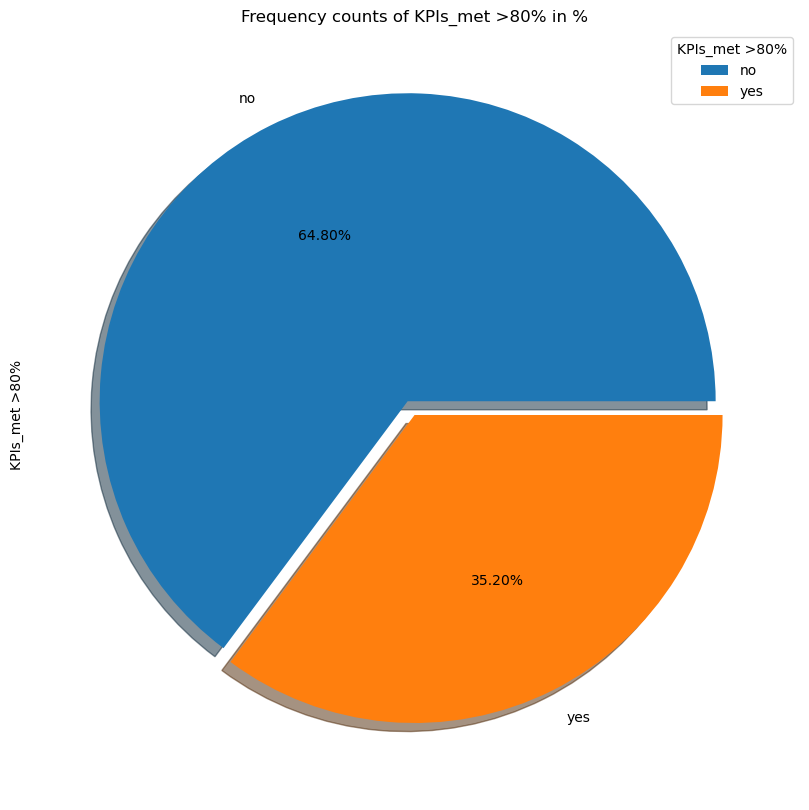

In [48]:
# How many employees KPIs_met >80% Create pie chart
plt.figure(figsize=(10,10))
train['KPIs_met >80%'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Frequency counts of KPIs_met >80% in %',
                                              explode=[0.05,0],shadow=True,labels=['no','yes'])
plt.legend(title='KPIs_met >80%',loc='best')
plt.show()

<Figure size 1000x1000 with 0 Axes>

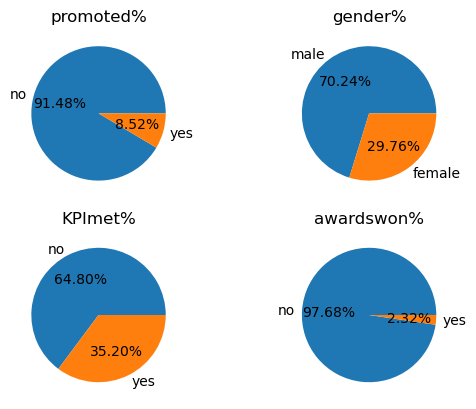

In [49]:
plt.figure(figsize=(10,10))
fig,axes=plt.subplots(2,2)
axes=axes.flatten()
axes[0].pie(train.is_promoted.value_counts(),autopct='%.2f%%',labels=['no','yes'])
axes[0].set_title("promoted%")

axes[1].pie(train.gender.value_counts(),autopct='%.2f%%',labels=['male','female'])
axes[1].set_title("gender%")

axes[2].pie(train["KPIs_met >80%"].value_counts(),autopct='%.2f%%',labels=['no','yes'])
axes[2].set_title("KPImet%")

axes[3].pie(train["awards_won?"].value_counts(),autopct='%.2f%%',labels=['no','yes'])
axes[3].set_title("awardswon%")

plt.show()

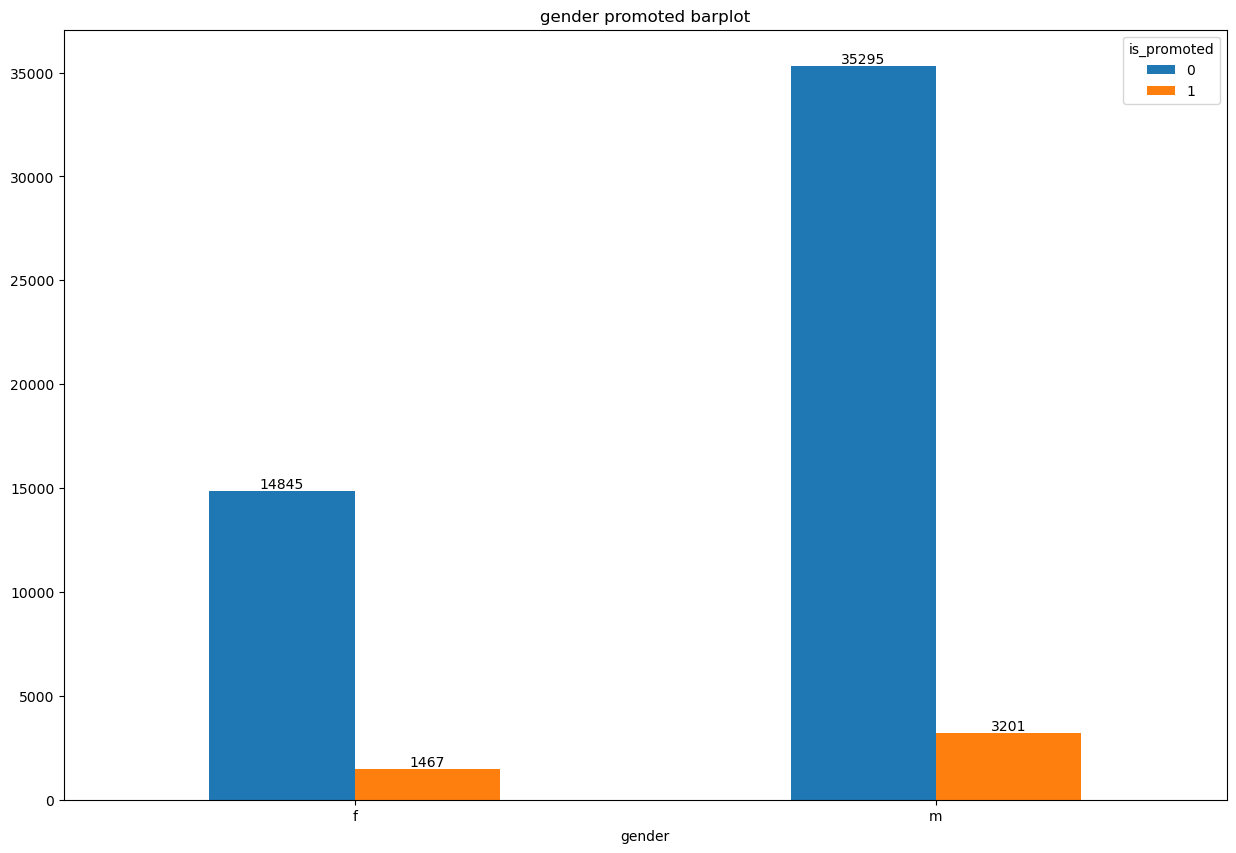

In [50]:
# Cross Tabulations - Stacked Bar Plot
# How many male and female employees got promoted
a=pd.crosstab(train.gender,train.is_promoted).plot(kind='bar',title='gender promoted barplot',figsize=(15,10))
for i in a.containers:
    a.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0)
plt.show()

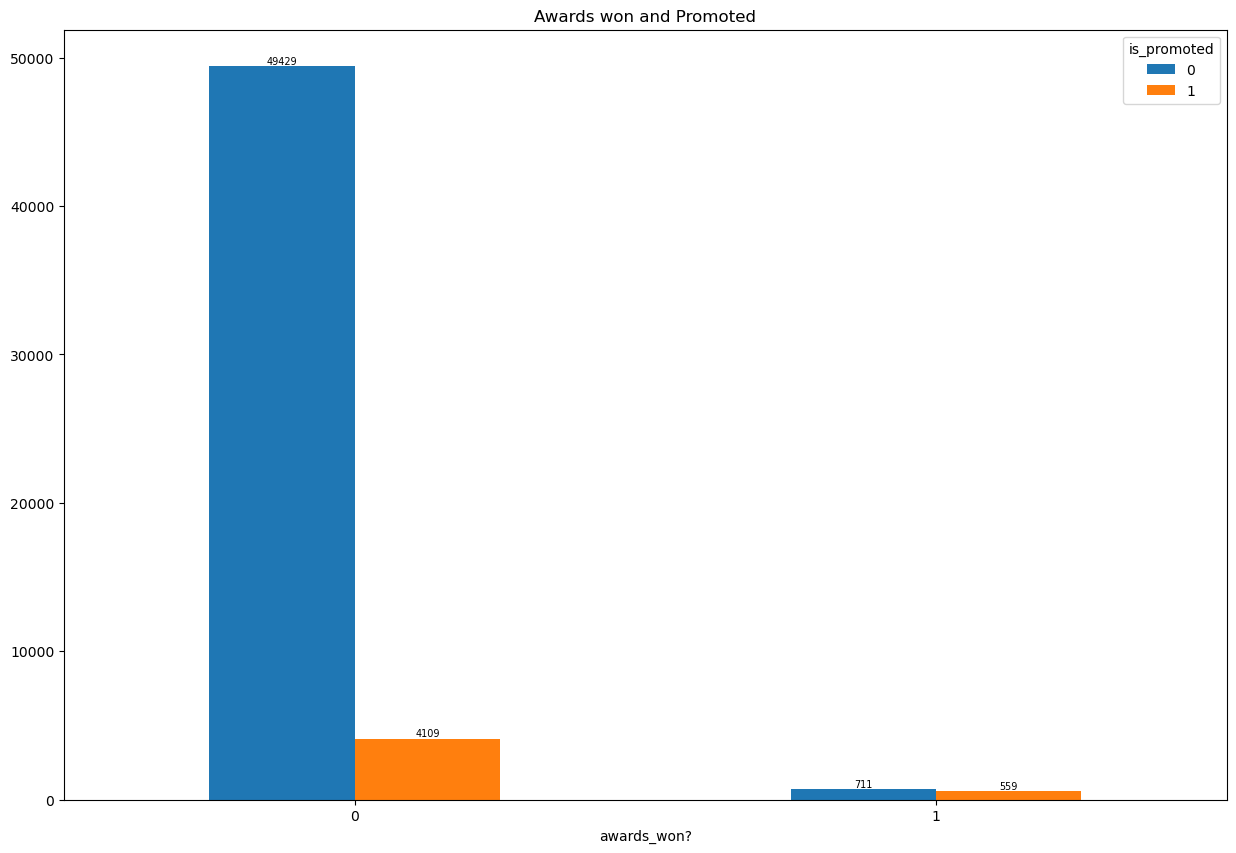

In [51]:
b=pd.crosstab(train['awards_won?'],train.is_promoted).plot(kind='bar',
                                                           title='Awards won and Promoted',figsize=(15,10))
for i in b.containers:
    b.bar_label(i,fontsize=7,label='center')
plt.xticks(rotation=0)
plt.show()

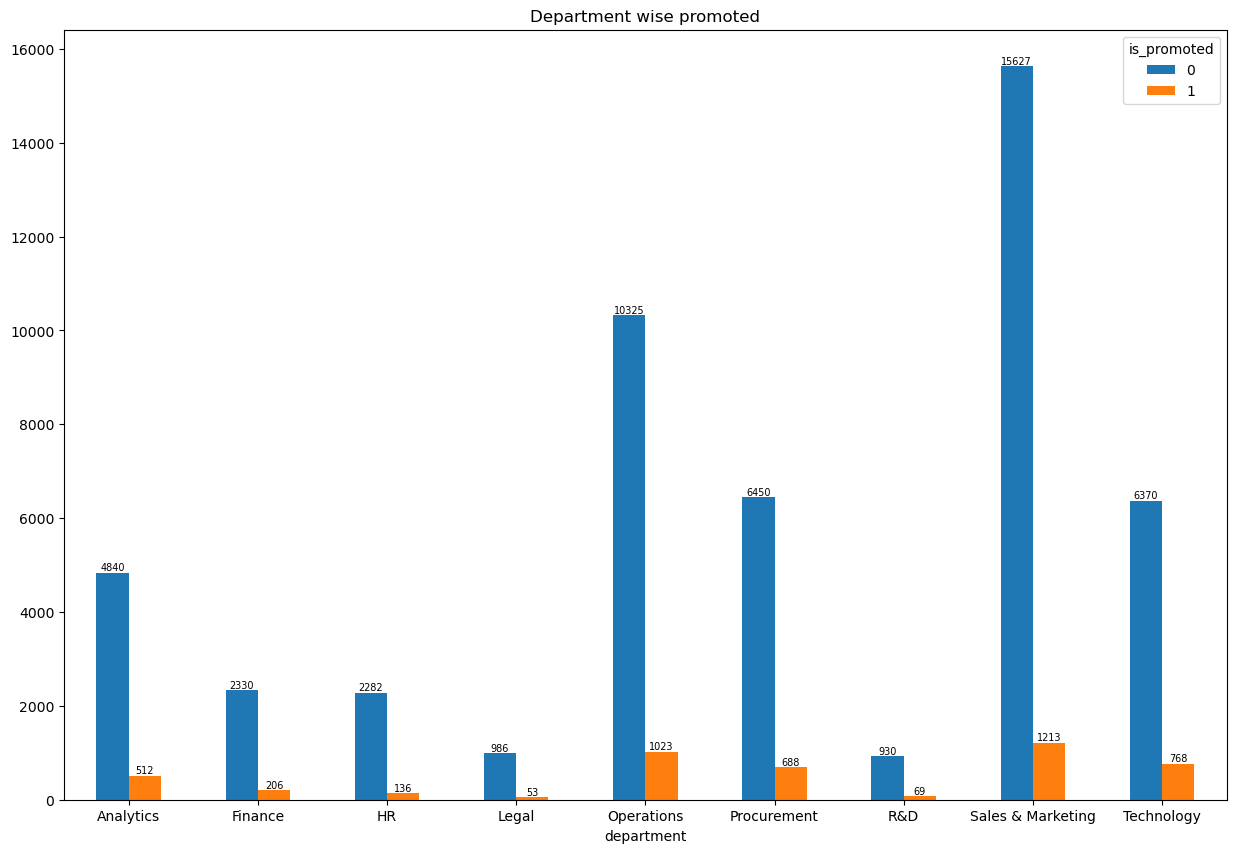

In [52]:
c=pd.crosstab(train.department,train.is_promoted).plot(kind='bar',
                                                               title='Department wise promoted',figsize=(15,10))
for i in c.containers:
    c.bar_label(i,fontsize=7,label='center')
plt.xticks(rotation=0)
plt.show()

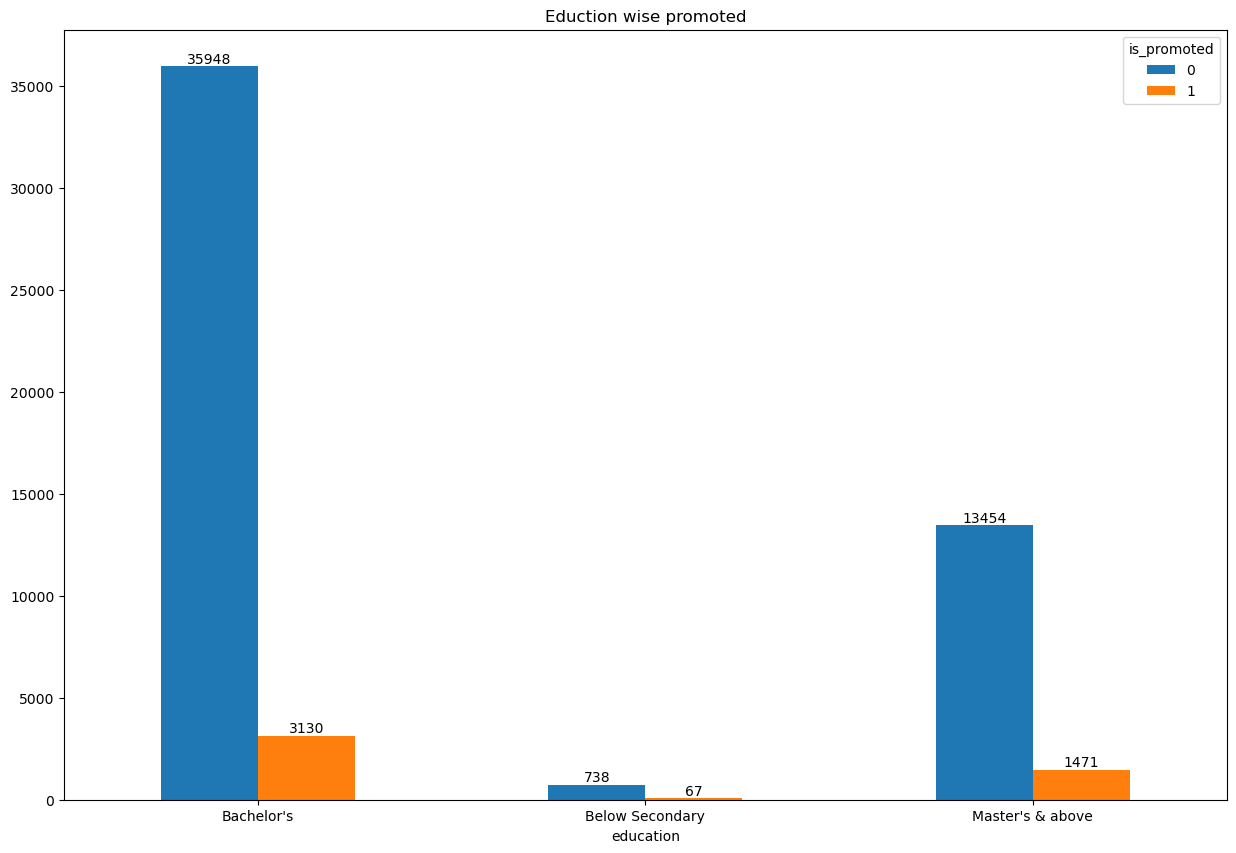

In [53]:
d=pd.crosstab(train.education,train.is_promoted).plot(kind='bar',
                                                              title='Eduction wise promoted',figsize=(15,10))
for i in d.containers:
    d.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0);

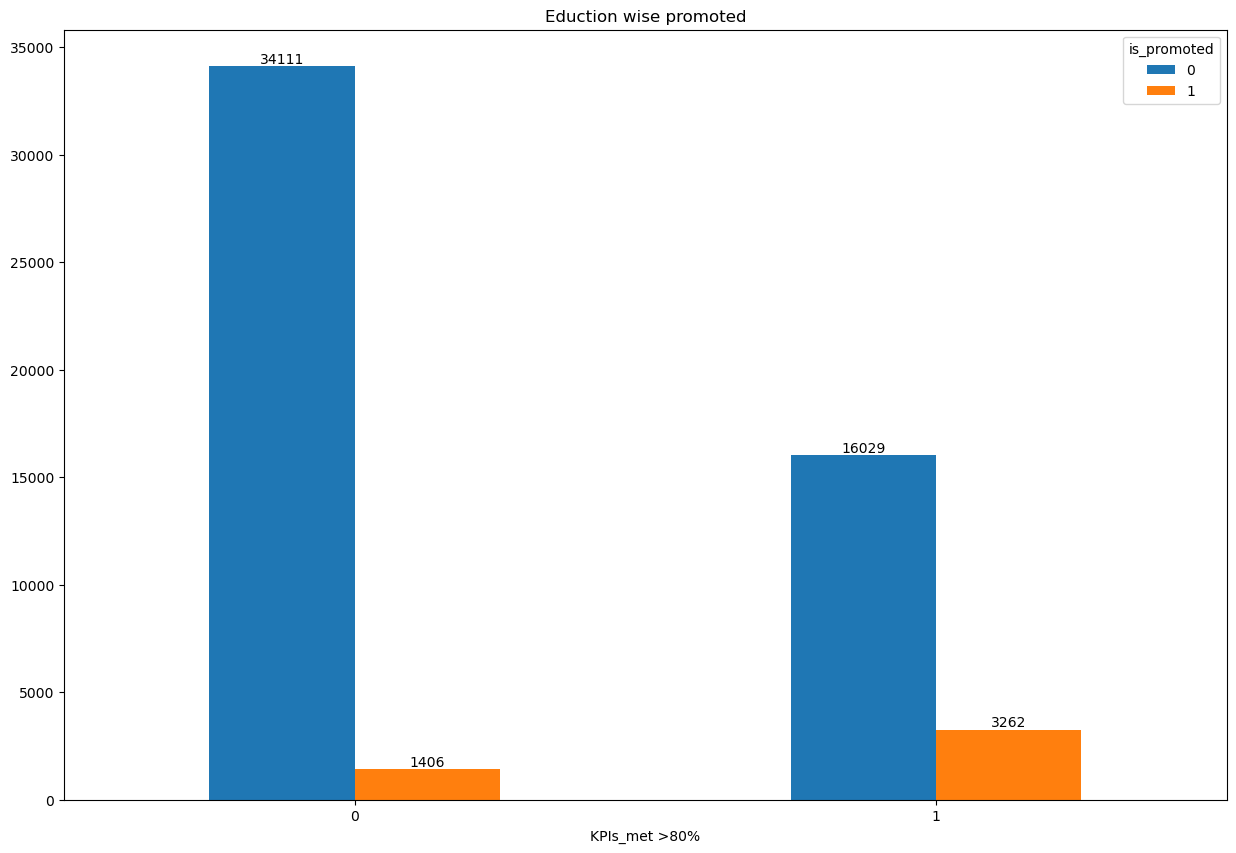

In [54]:
d=pd.crosstab(train['KPIs_met >80%'],train.is_promoted).plot(kind='bar',
                                                              title='Eduction wise promoted',figsize=(15,10))
for i in d.containers:
    d.bar_label(i,fontsize=10,label='center')
plt.xticks(rotation=0);

# Hypothesis Testing

In [55]:
# Test Null Average avg_training_score of is_promoted equal
pro0=train[train.is_promoted==0]
pro1=train[train.is_promoted==1]

In [56]:
from scipy.stats import ttest_ind

In [57]:
ttest_ind(pro0.avg_training_score,pro1.avg_training_score,equal_var=False)
# since pvalue=7.662329172468838e-291 is less than 0.05,Reject Null

Ttest_indResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291)

In [58]:
# Test Null Average avg_training_score of male & female equal
# We cannot do ttest independent (or) single-factor anova (or) chi-square  test with train_df because it is dummy encoded.
# So, we have taken train data
m=train[train.gender=='m']
f=train[train.gender=='f']

In [59]:
ttest_ind(m.avg_training_score,f.avg_training_score,equal_var=False)
# since pvalue=9.321257169457854e-10 is less than 0.05,Reject Null

Ttest_indResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10)

In [60]:
# Test Null Average length_of_service of different education equal
train.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [61]:
bachelor=train[train.education=="Bachelor's"]
MS=train[train.education=="Master's & above"]
secondary=train[train.education=="Below Secondary"]

In [62]:
from scipy.stats import f_oneway

In [63]:
f_oneway(bachelor.length_of_service,MS.length_of_service,secondary.length_of_service)
#since pvalue=0.0 is less than 0.05,Reject Null

F_onewayResult(statistic=2139.4671050759575, pvalue=0.0)

In [64]:
# Test Null Average avg_training_score of different education equal
train.avg_training_score.groupby(train.education).mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [65]:
f_oneway(bachelor.avg_training_score,MS.avg_training_score,secondary.avg_training_score)
# Since pvalue=2.873996658407989e-15 is less than 0.05, Reject Null

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [66]:
# Test Null Average avg_age of is_promoted equal
ttest_ind(pro0.age,pro1.age,equal_var=False)
# since pvalue=1.6363839947815405e-05 is less than 0.05,Reject Null

Ttest_indResult(statistic=4.31315199629288, pvalue=1.6363839947815405e-05)

In [67]:
# Test Null Average avg_length_of_service of is_promoted equal
ttest_ind(pro0.length_of_service,pro1.length_of_service,equal_var=False)
# since pvalue<0.05, Reject Null

Ttest_indResult(statistic=2.6420549711884886, pvalue=0.008262946987836755)

In [68]:
# Test Null Average avg_training_score of is_promoted equal
ttest_ind(pro0.avg_training_score,pro1.avg_training_score,equal_var=False)
# since pvalue<0.05, Reject Null

Ttest_indResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291)

In [69]:
# Test Null No Association between is_promoted and gender
pd.crosstab(train.is_promoted,train.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [70]:
from scipy.stats import chi2_contingency

In [71]:
chi2_contingency(pd.crosstab(train.is_promoted,train.gender))
# since pvalue=0.009765091521176657 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [72]:
# Test Null No Association between is_promoted and department
pd.crosstab(train.is_promoted,train.department)

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [73]:
chi2_contingency(pd.crosstab(train.is_promoted,train.department))
# since pvalue=9.882497107474489e-29 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=151.42635516323872, pvalue=9.882497107474489e-29, dof=8, expected_freq=array([[ 4896.1699022 ,  2320.00875785,  2212.05882353,   950.50831995,
        10381.49029339,  6530.05619618,   913.91512188, 15405.73638885,
         6530.05619618],
       [  455.8300978 ,   215.99124215,   205.94117647,    88.49168005,
          966.50970661,   607.94380382,    85.08487812,  1434.26361115,
          607.94380382]]))

In [74]:
# Test Null No Association between is_promoted and 'KPIs_met >80%'
pd.crosstab(train.is_promoted,train['KPIs_met >80%'])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [75]:
chi2_contingency(pd.crosstab(train.is_promoted,train['KPIs_met >80%']))
# since pvalue=0.0 is less than 0.05,Reject Null

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921, 17647.98460079],
       [ 3024.98460079,  1643.01539921]]))

# Split Data into X & y

In [76]:
# Split Data into X(independent variables) & y(dependent variable)
y=train_df.is_promoted
X=train_df.drop('is_promoted',axis=1)

In [77]:
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [78]:
# labelencode Dependent variable y
from sklearn.preprocessing import LabelEncoder

In [79]:
y=LabelEncoder().fit_transform(y)

In [80]:
y=pd.DataFrame(y,columns=['is_promoted'])

# Logistic Regression with Imbalance Data

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logit=LogisticRegression(max_iter=3000)

In [83]:
logmod=logit.fit(X,y)

In [84]:
logmod.score(X,y)

0.9316340680192673

In [85]:
pred_log=logmod.predict(X)

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
cross_val_score(logit,X,y)

array([0.93258529, 0.93039591, 0.93048714, 0.93321777, 0.93066326])

In [88]:
np.mean([0.93258529, 0.93039591, 0.93048714, 0.93321777, 0.93066326])

0.931469874

In [89]:
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay,classification_report,roc_curve,auc

In [90]:
print(classification_report(y,pred_log))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.80      0.26      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [91]:
# Get predicted probabilities
log_pred_prob=logmod.predict_proba(X)[:,1]

In [92]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, log_pred_prob)

In [93]:
logroc_auc = auc(fpr, tpr)

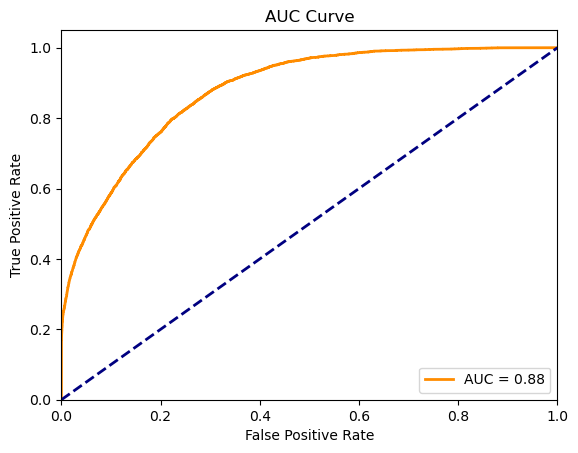

In [94]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % logroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

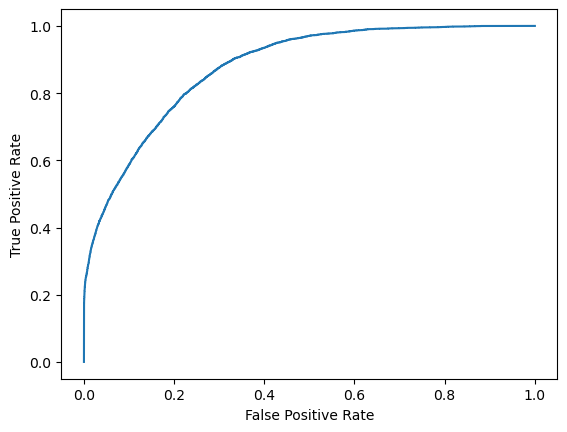

In [95]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

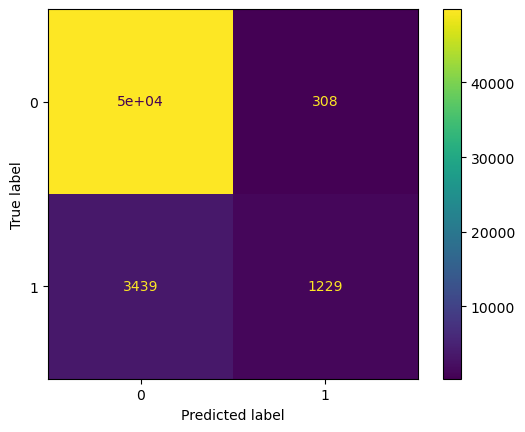

In [96]:
ConfusionMatrixDisplay.from_predictions(y,pred_log)

# Due to Imbalance in Data, To balance the Data Sampling Technique is used

In [97]:
# Due to imbalance in data, minority class prediction is worst
# So, we will do sampling 
from imblearn.over_sampling import SMOTENC

In [98]:
smote=SMOTENC(categorical_features=list(range(4,64)),random_state=42)

In [99]:
X_smt,y_smt=smote.fit_resample(X,y)

In [100]:
y_smt=pd.DataFrame(y_smt,columns=['is_promoted'])

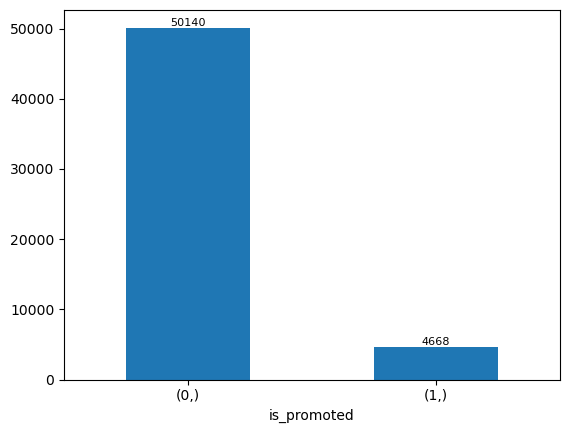

In [101]:
a=y.value_counts().plot(kind='bar')
for i in a.containers:
    a.bar_label(i,fontsize=8)
plt.xticks(rotation=0);

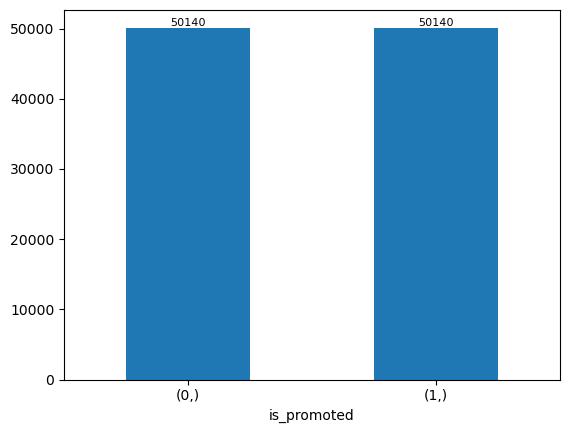

In [102]:
a=y_smt.value_counts().plot(kind='bar')
for i in a.containers:
    a.bar_label(i,fontsize=8)
plt.xticks(rotation=0);

# Logistic Regression with Balanced Data

In [103]:
logitmodel=logit.fit(X_smt,y_smt)

In [104]:
logitmodel.score(X_smt,y_smt)

0.8806541683286797

In [105]:
cross_val_score(logit,X_smt,y_smt)

array([0.80404866, 0.89369765, 0.89414639, 0.89663941, 0.89624053])

In [106]:
np.mean([0.80404866, 0.89369765, 0.89414639, 0.89663941, 0.89624053])

0.876954528

In [107]:
log_pred=logitmodel.predict(X_smt)

In [108]:
print(classification_report(y_smt,log_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     50140
           1       0.89      0.87      0.88     50140

    accuracy                           0.88    100280
   macro avg       0.88      0.88      0.88    100280
weighted avg       0.88      0.88      0.88    100280



In [109]:
# Get predicted probabilities
log_pred_prob1=logitmodel.predict_proba(X_smt)[:,1]

In [110]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, log_pred_prob1)

In [111]:
logroc_auc1 = auc(fpr, tpr)

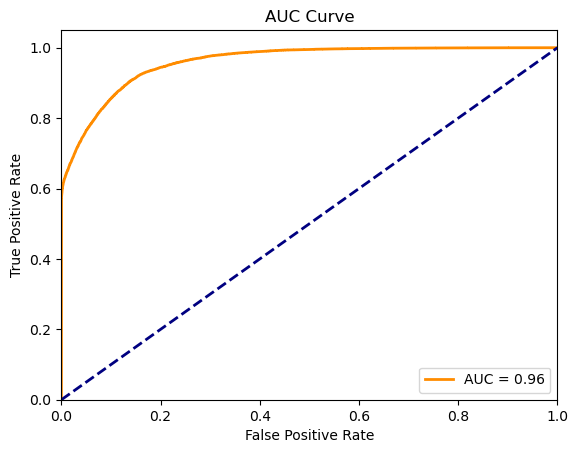

In [112]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % logroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

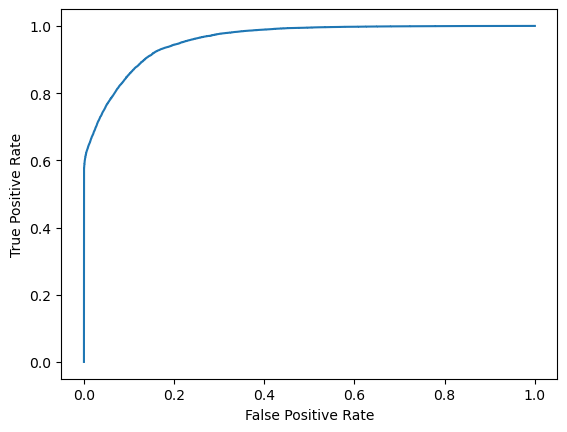

In [113]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

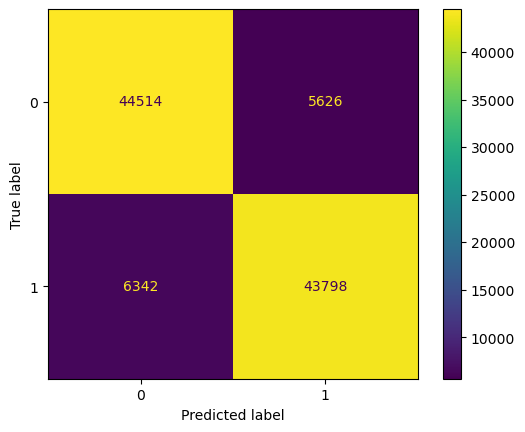

In [114]:
ConfusionMatrixDisplay.from_predictions(y_smt,log_pred)

# Decision Tree with Balanced Data

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
tree=DecisionTreeClassifier()

In [117]:
treemodel=tree.fit(X_smt,y_smt)

In [118]:
treemodel.score(X_smt,y_smt)

0.9990626246509773

In [119]:
cross_val_score(tree,X_smt,y_smt)

array([0.86572597, 0.93767451, 0.93812325, 0.93941963, 0.9417132 ])

In [120]:
np.mean([0.86572597, 0.93767451, 0.93812325, 0.93941963, 0.9417132 ])

0.9245313119999998

In [121]:
tree_pred=treemodel.predict(X_smt)

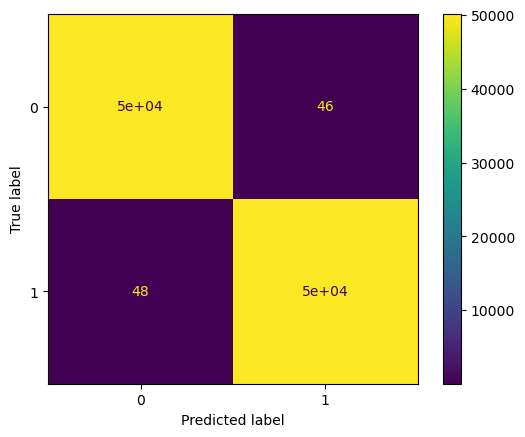

In [122]:
ConfusionMatrixDisplay.from_predictions(y_smt,tree_pred)

In [123]:
print(classification_report(y_smt,tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00     50140

    accuracy                           1.00    100280
   macro avg       1.00      1.00      1.00    100280
weighted avg       1.00      1.00      1.00    100280



In [124]:
# Get predicted probabilities
tree_pred_prob=treemodel.predict_proba(X_smt)[:,1]

In [125]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, tree_pred_prob)

In [126]:
treeroc_auc = auc(fpr, tpr)

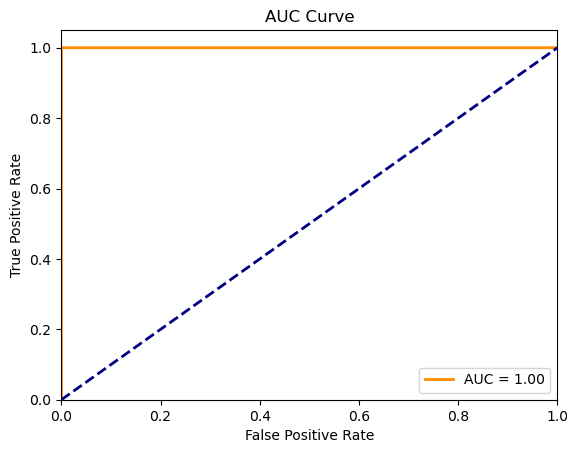

In [127]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % treeroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

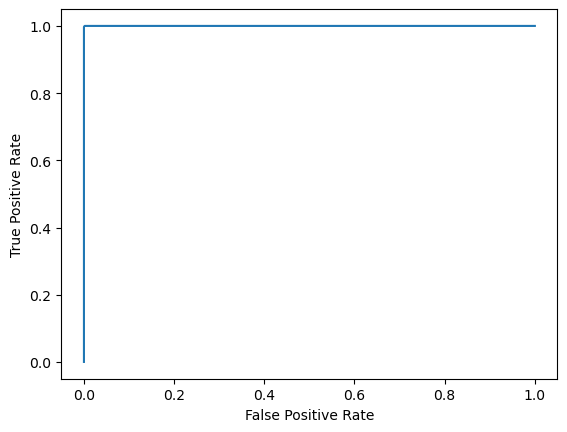

In [128]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [129]:
pred_tree=treemodel.predict(test_df)

In [130]:
pd.DataFrame(pred_tree).to_csv("tree.csv")

# Random Forest with Balanced Data

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf=RandomForestClassifier()

In [133]:
rfmodel=rf.fit(X_smt,y_smt)

In [134]:
rfmodel.score(X_smt,y_smt)

0.9990626246509773

In [135]:
cross_val_score(rf,X_smt,y_smt)

array([0.86936578, 0.96769047, 0.96793977, 0.96998404, 0.96788991])

In [136]:
np.mean([0.86936578, 0.96769047, 0.96793977, 0.96998404, 0.96788991])

0.948573994

In [137]:
rf_pred=rfmodel.predict(X_smt)

In [138]:
print(classification_report(y_smt,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50140
           1       1.00      1.00      1.00     50140

    accuracy                           1.00    100280
   macro avg       1.00      1.00      1.00    100280
weighted avg       1.00      1.00      1.00    100280



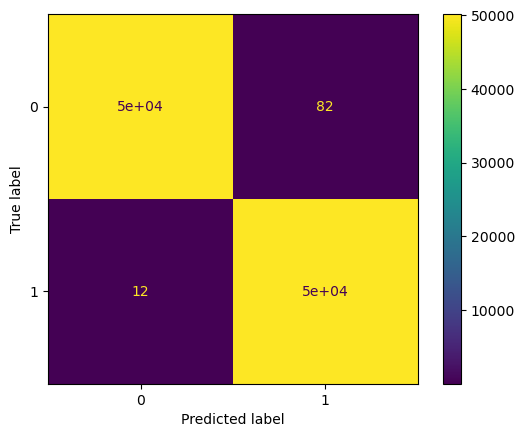

In [139]:
ConfusionMatrixDisplay.from_predictions(y_smt,rf_pred)

In [140]:
# Get predicted probabilities
rf_pred_prob=logmod.predict_proba(X_smt)[:,1]

In [141]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, rf_pred_prob)

In [142]:
rfroc_auc = auc(fpr, tpr)

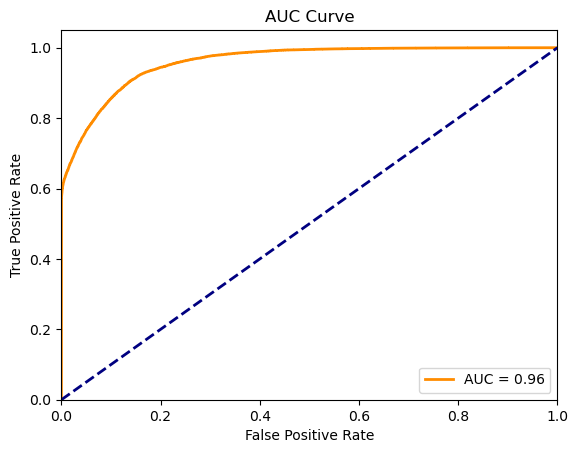

In [143]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % rfroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

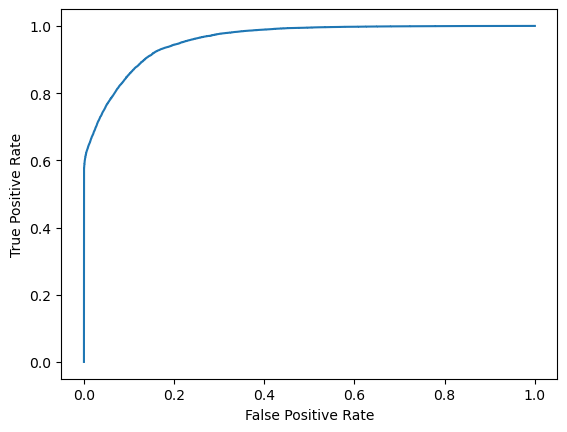

In [144]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [145]:
predict_rf=rfmodel.predict(test_df)

In [146]:
pd.DataFrame(predict_rf).to_csv('rf.csv')

# Gradient Boosting with Balanced Data

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
gb=GradientBoostingClassifier(n_estimators=3000)

In [149]:
gbmodel=gb.fit(X_smt,y_smt)

In [150]:
gbmodel.score(X_smt,y_smt)

0.9342740327084165

In [151]:
cross_val_score(gb,X_smt,y_smt)

array([0.84952134, 0.9414639 , 0.9441065 , 0.94236139, 0.93951935])

In [152]:
np.mean([0.84952134, 0.9414639 , 0.9441065 , 0.94236139, 0.93951935])

0.9233944959999999

In [153]:
gb_pred=gbmodel.predict(X_smt)

In [154]:
print(classification_report(y_smt,gb_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     50140
           1       0.92      0.95      0.94     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



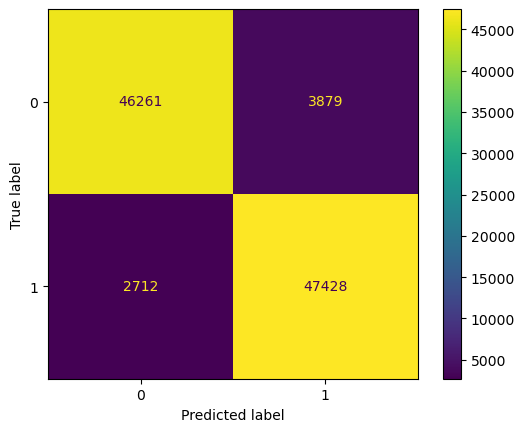

In [155]:
ConfusionMatrixDisplay.from_predictions(y_smt,gb_pred)

In [156]:
# Get predicted probabilities
gb_pred_prob=logmod.predict_proba(X_smt)[:,1]

In [157]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt,gb_pred_prob)

In [158]:
gbroc_auc = auc(fpr, tpr)

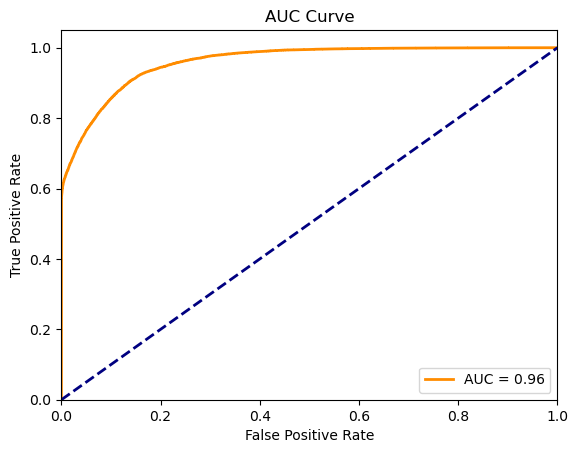

In [159]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % gbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

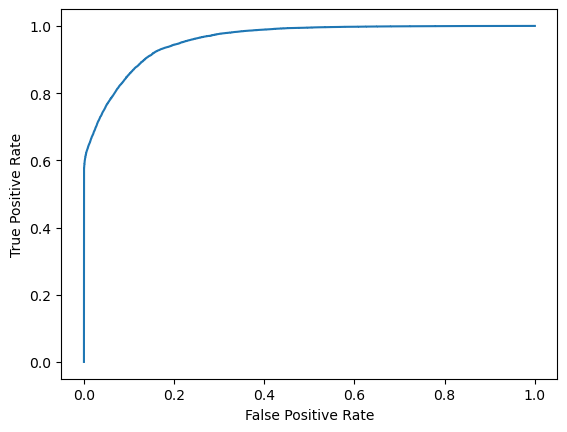

In [160]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [161]:
pred_gb=gbmodel.predict(test_df)

In [162]:
pd.DataFrame(pred_gb).to_csv("gb.csv")

# Naive Bayes

In [163]:
from sklearn.naive_bayes import BernoulliNB

In [164]:
nb=BernoulliNB()

In [165]:
nbmodel=nb.fit(X_smt,y_smt)

In [166]:
nbmodel.score(X_smt,y_smt)

0.7602712405265257

In [167]:
cross_val_score(nb,X_smt,y_smt)

array([0.73364579, 0.76266454, 0.76017152, 0.76695253, 0.76670323])

In [168]:
np.mean([0.73364579, 0.76266454, 0.76017152, 0.76695253, 0.76670323])

0.7580275220000001

In [169]:
nb_pred=nbmodel.predict(X_smt)

In [170]:
print(classification_report(y_smt,nb_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     50140
           1       0.76      0.76      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



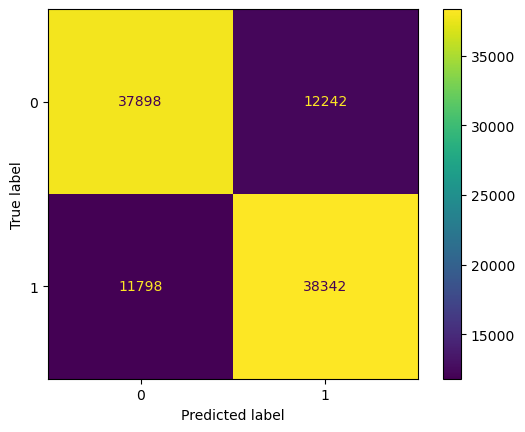

In [171]:
ConfusionMatrixDisplay.from_predictions(y_smt,nb_pred)

In [172]:
# Get predicted probabilities
nb_pred_prob=nbmodel.predict_proba(X_smt)[:,1]

In [173]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt,nb_pred_prob)

In [174]:
nbroc_auc = auc(fpr, tpr)

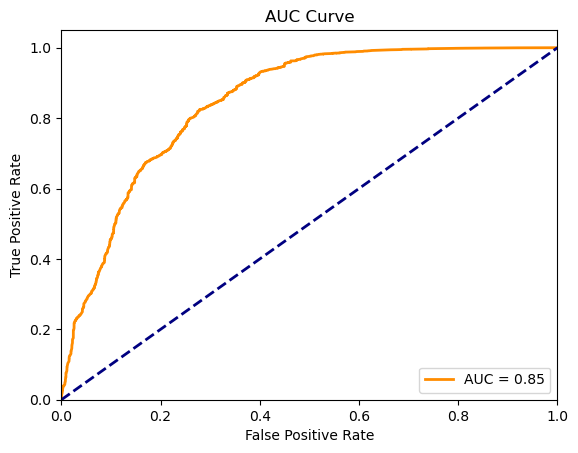

In [175]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % nbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

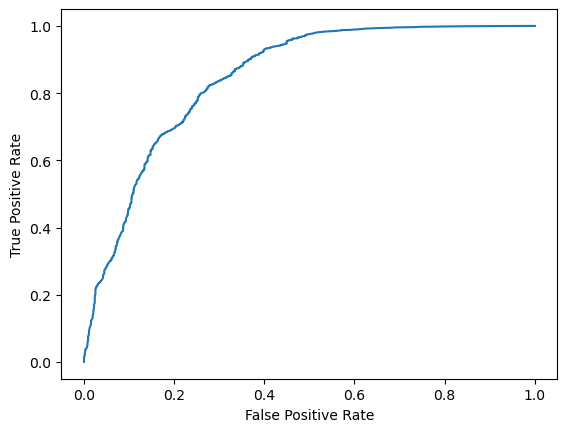

In [176]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [177]:
pred_nb=nbmodel.predict(test_df)

# Support vector Machine with Balanced Data

In [178]:
from sklearn.svm import SVC

In [179]:
svc=SVC(probability=True)

In [180]:
svcmodel=svc.fit(X_smt,y_smt)

In [181]:
svcmodel.score(X_smt,y_smt)

0.7898484244116474

In [182]:
svc_pred=svcmodel.predict(X_smt)

In [ ]:
cross_val_score(svc,X_smt,y_smt)

In [309]:
np.mean([0.76949541, 0.77458117, 0.77079178, 0.77627643, 0.77956721])

0.7741424

In [ ]:
print(classification_report(y_smt,svc_pred)

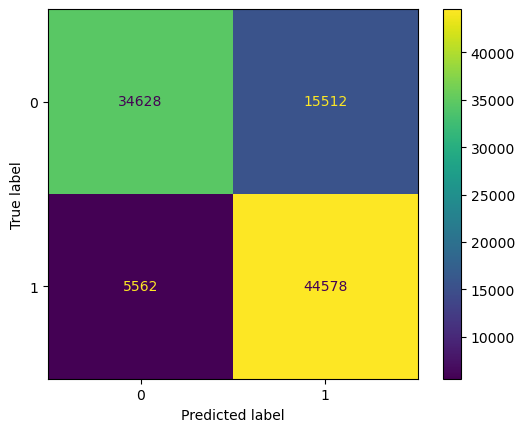

In [311]:
ConfusionMatrixDisplay.from_predictions(y_smt,svc_pred)

In [312]:
# Get predicted probabilities
svc_pred_prob=svcmodel.predict_proba(X_smt)[:,1]

In [313]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt,nb_pred_prob)

In [314]:
nbroc_auc = auc(fpr, tpr)

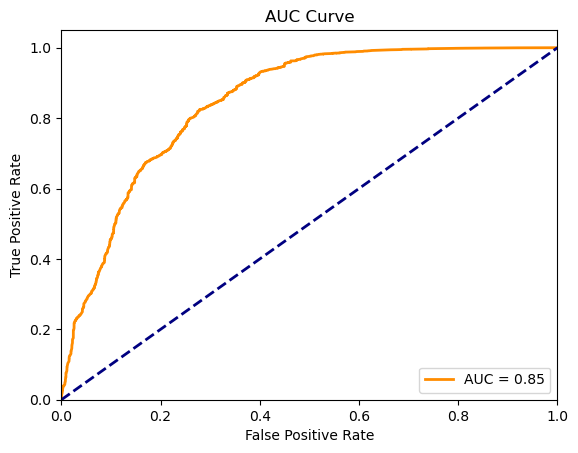

In [315]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % nbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

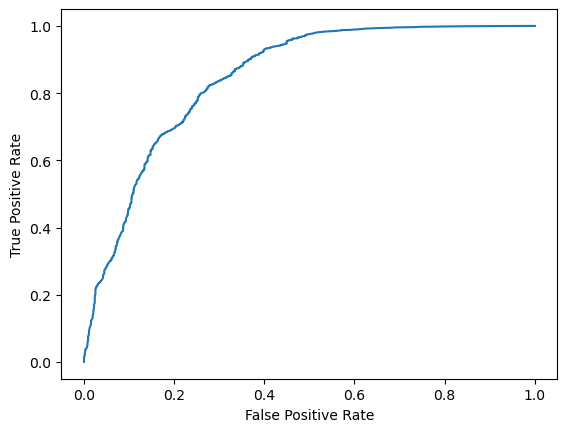

In [316]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [317]:
pred_gb=gbmodel.predict(test_df)

# K Nearest Neighbors with Balanced Data

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [205]:
knn=KNeighborsClassifier()

In [210]:
krange=list(range(1,21))
param_grid=dict(n_neighbors=krange)
grid=GridSearchCV(knn,param_grid,cv=3)

In [211]:
grid_search=grid.fit(X_smt,y_smt)

In [212]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [213]:
grid_search.best_params_

{'n_neighbors': 2}

In [214]:
knn=KNeighborsClassifier(n_neighbors=2)

In [215]:
knnmodel=knn.fit(X_smt,y_smt)

In [216]:
knnmodel.score(X_smt,y_smt)

0.9832369365775828

In [217]:
cross_val_score(knn,X_smt,y_smt)

array([0.89718787, 0.90456721, 0.90456721, 0.90611288, 0.90611288])

In [218]:
np.mean([0.89718787, 0.90456721, 0.90456721, 0.90611288, 0.90611288])

0.9037096100000002

In [220]:
knn_pred=knnmodel.predict(X_smt)

In [221]:
print(classification_report(y_smt,knn_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     50140
           1       1.00      0.97      0.98     50140

    accuracy                           0.98    100280
   macro avg       0.98      0.98      0.98    100280
weighted avg       0.98      0.98      0.98    100280



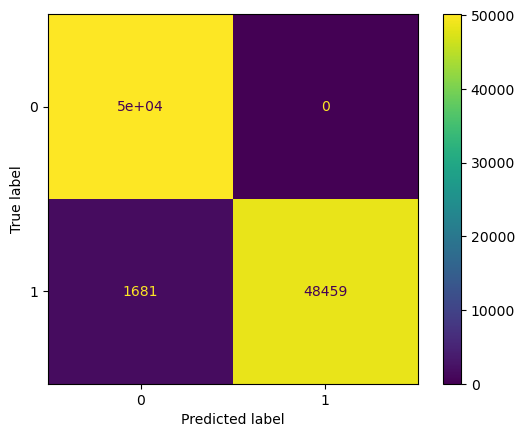

In [222]:
ConfusionMatrixDisplay.from_predictions(y_smt,knn_pred)

In [223]:
# Get predicted probabilities
knn_pred_prob=knnmodel.predict_proba(X_smt)[:,1]

In [224]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, knn_pred_prob)

In [225]:
knnroc_auc = auc(fpr, tpr)

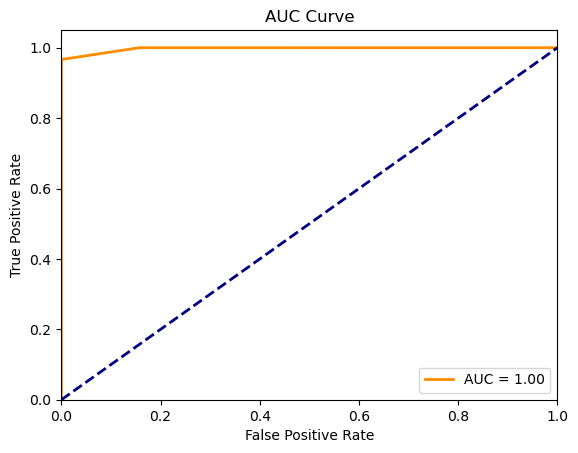

In [226]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % knnroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

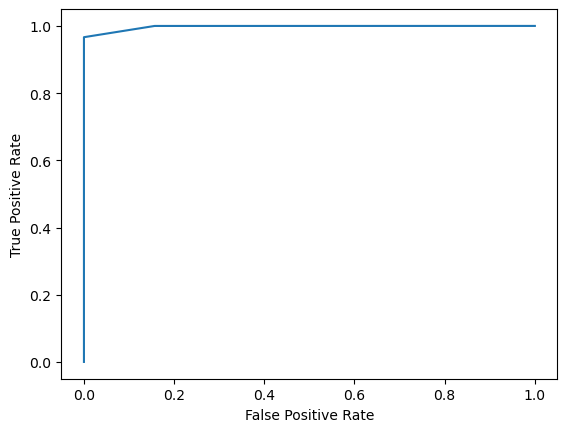

In [227]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

# XG Boost with Balanced Data 

In [228]:
from xgboost import XGBClassifier

In [229]:
xgb=XGBClassifier(max_depth=22)

In [230]:
xgbmodel=xgb.fit(X_smt,y_smt)

In [231]:
xgbmodel.score(X_smt,y_smt)

0.9959014758675708

In [232]:
cross_val_score(xgb,X_smt,y_smt)

array([0.87684483, 0.9668927 , 0.96584563, 0.96983446, 0.96624452])

In [233]:
np.mean([0.87684483, 0.9668927 , 0.96584563, 0.96983446, 0.96624452])

0.9491324280000001

In [234]:
xgb_pred=xgbmodel.predict(X_smt)

In [235]:
print(classification_report(y_smt,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50140
           1       0.99      1.00      1.00     50140

    accuracy                           1.00    100280
   macro avg       1.00      1.00      1.00    100280
weighted avg       1.00      1.00      1.00    100280



In [236]:
# Get predicted probabilities
xgb_pred_prob=xgbmodel.predict_proba(X_smt)[:,1]

In [237]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, xgb_pred_prob)

In [238]:
xgbroc_auc = auc(fpr, tpr)

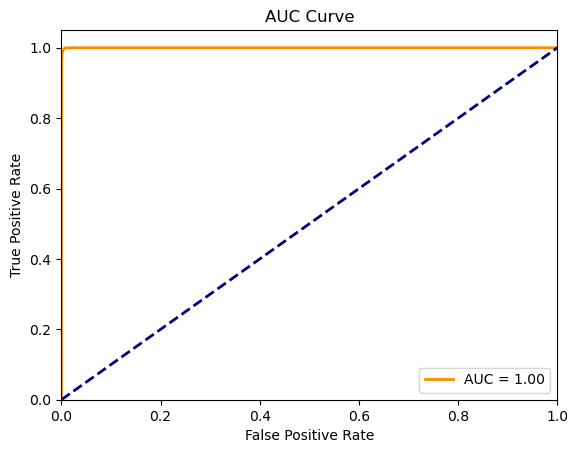

In [239]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % xgbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

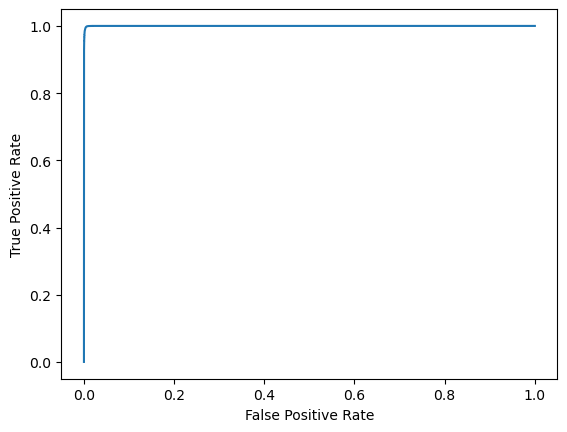

In [240]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

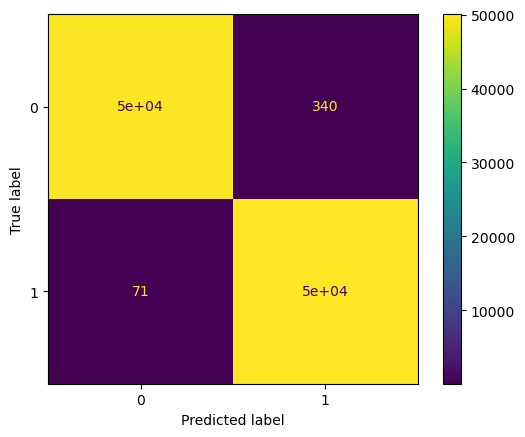

In [241]:
ConfusionMatrixDisplay.from_predictions(y_smt,xgb_pred)

In [242]:
pred_xgb=xgbmodel.predict(test_df)

In [243]:
pd.DataFrame(pred_xgb).to_csv("xgb.csv")

# ADA Boost with Balanced Data

In [244]:
from sklearn.ensemble import AdaBoostClassifier

In [245]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=1)

In [246]:
adamodel=ada.fit(X_smt,y_smt)

In [247]:
adamodel.score(X_smt,y_smt)

0.8811627443159155

In [248]:
cross_val_score(ada,X_smt,y_smt)

array([0.80544475, 0.89569206, 0.89574192, 0.89663941, 0.89619067])

In [250]:
np.mean([0.80544475, 0.89569206, 0.89574192, 0.89663941, 0.89619067])

0.8779417620000001

In [251]:
ada_pred=adamodel.predict(X_smt)

In [252]:
print(classification_report(y_smt,ada_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     50140
           1       0.89      0.87      0.88     50140

    accuracy                           0.88    100280
   macro avg       0.88      0.88      0.88    100280
weighted avg       0.88      0.88      0.88    100280



In [253]:
# Get predicted probabilities
ada_pred_prob=adamodel.predict_proba(X_smt)[:,1]

In [254]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, ada_pred_prob)

In [255]:
adaroc_auc = auc(fpr, tpr)

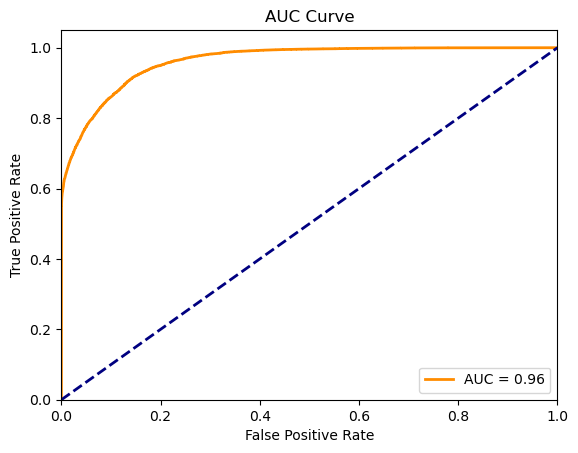

In [256]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % adaroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

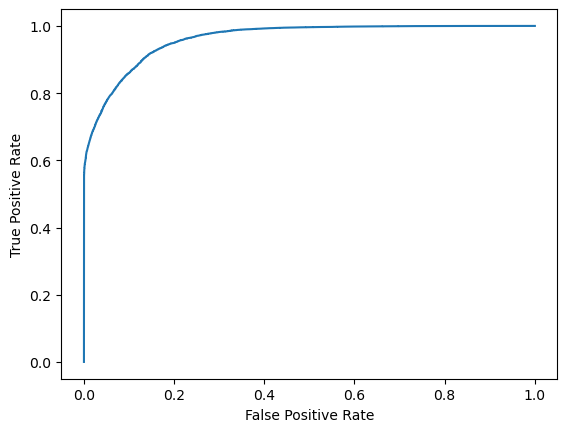

In [257]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

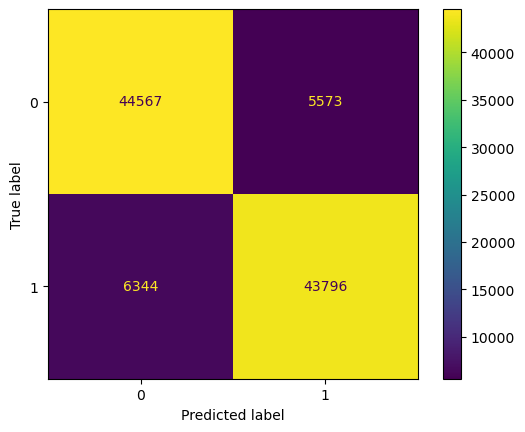

In [259]:
ConfusionMatrixDisplay.from_predictions(y_smt,ada_pred)

# Cat Boost with Balanced Data

In [260]:
from catboost import CatBoostClassifier

In [261]:
weight=[1,0.43]
cat=CatBoostClassifier(iterations=5000,logging_level="Silent",class_weights=weight, 
        eval_metric="AUC")

In [262]:
catmodel=cat.fit(X_smt,y_smt)

In [263]:
catmodel.score(X_smt,y_smt)

0.931541683286797

In [264]:
cross_val_score(cat,X_smt,y_smt)

array([0.83850219, 0.94151376, 0.94161348, 0.94465497, 0.94201237])

In [265]:
np.mean([0.83850219, 0.94151376, 0.94161348, 0.94465497, 0.94201237])

0.9216593540000002

In [266]:
cat_pred=catmodel.predict(X_smt)

In [267]:
print(classification_report(y_smt,cat_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     50140
           1       0.96      0.90      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



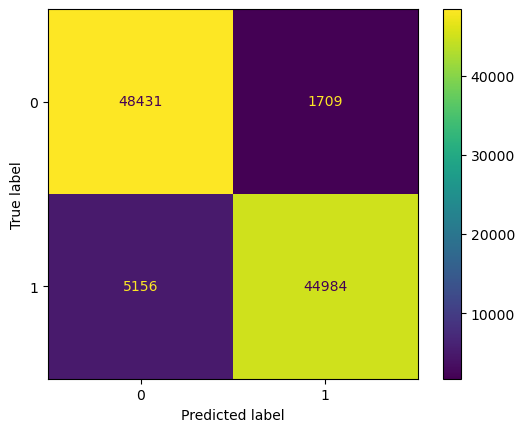

In [268]:
ConfusionMatrixDisplay.from_predictions(y_smt,cat_pred)

In [269]:
# Get predicted probabilities
cat_pred_prob=catmodel.predict_proba(X_smt)[:,1]

In [270]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, cat_pred_prob)

In [271]:
catroc_auc = auc(fpr, tpr)

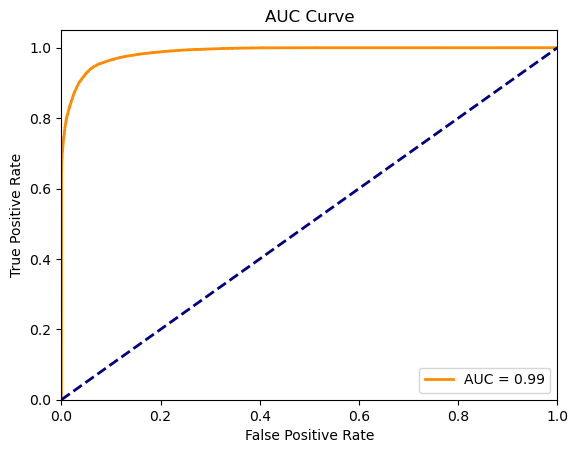

In [272]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % catroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

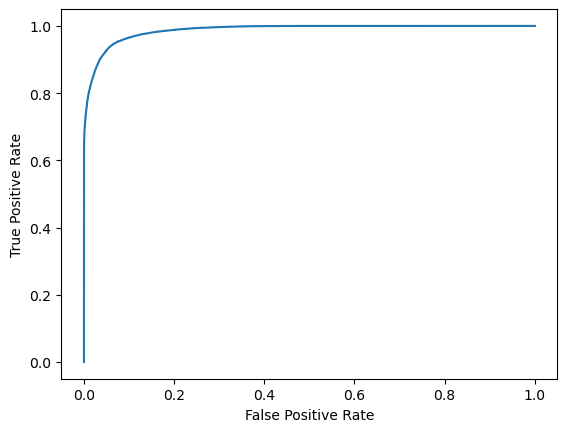

In [273]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [274]:
pred_pred=catmodel.predict(test_df)

In [275]:
pd.DataFrame(cat_pred).to_csv('cat.csv')

# Converting Predicted test values into csv file

In [276]:
pred_xgb=xgbmodel.predict(test_df)

In [277]:
pd.DataFrame(pred_xgb).to_csv("xgb1.csv")

In [320]:
logscore=logitmodel.score(X_smt,y_smt)
treescore=treemodel.score(X_smt,y_smt)
rfscore=rfmodel.score(X_smt,y_smt)
gbscore=gbmodel.score(X_smt,y_smt)
nbscore=nbmodel.score(X_smt,y_smt)
svcscore=svcmodel.score(X_smt,y_smt)
knnscore=knnmodel.score(X_smt,y_smt)
xgbscore=xgbmodel.score(X_smt,y_smt)
adascore=adamodel.score(X_smt,y_smt)
catscore=catmodel.score(X_smt,y_smt)

In [321]:
print("Logistic Accuracy:",round(logscore,2),'%')
print("Decision tree Accuracy:",round(treescore,2),'%')
print("Random Forest Accuracy:",round(rfscore,2),'%')
print("Gradient Boosting Accuracy:",round(gbscore,2),'%')
print("Naive Bayes Accuracy:",round(nbscore,2),'%')
print("Support Vector Machine Accuracy:",round(svcscore,2),'%')
print("KNearest Neighbors Accuracy:",round(knnscore,2),'%')
print("XGBoost Accuracy:",round(xgbscore,2),'%')
print("ADABoost Accuracy:",round(adascore,2),'%')
print("CatBoost Accuracy:",round(catscore,2),'%')

Logistic Accuracy: 0.88 %
Decision tree Accuracy: 1.0 %
Random Forest Accuracy: 1.0 %
Gradient Boosting Accuracy: 0.93 %
Naive Bayes Accuracy: 0.76 %
Support Vector Machine Accuracy: 0.79 %
KNearest Neighbors Accuracy: 0.98 %
XGBoost Accuracy: 1.0 %
ADABoost Accuracy: 0.88 %
CatBoost Accuracy: 0.93 %


# Conclusion:

I have submitted predicted test values into the competition HR analytics: Predict whether employee is_promoted or not
on Analytics vidhya website, among all those models,
XGradient Boosting Model(max_depth=22) has the highest accuracy with a score of 0.45157.